In [1]:
import torch
import pandas as pd

# Load data
We will load the data from the csv file and display the first few rows of the data to get an idea of the data.

In [2]:
data = pd.read_csv('data/Blood_samples_dataset_balanced_2(f).csv')
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


# Data Preprocessing
Next, we will preprocess the data. Because the data values are on a scale between 0 and 1, we'll need to handle possible missing values or categorize the target variable if it's not already set.

In [3]:
print(data.isnull().sum())

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

It looks like there are no missing values in the data. Next, we'll check the data types of the columns to see if the target variable is already categorized.

In [4]:
data.dtypes

Glucose                                      float64
Cholesterol                                  float64
Hemoglobin                                   float64
Platelets                                    float64
White Blood Cells                            float64
Red Blood Cells                              float64
Hematocrit                                   float64
Mean Corpuscular Volume                      float64
Mean Corpuscular Hemoglobin                  float64
Mean Corpuscular Hemoglobin Concentration    float64
Insulin                                      float64
BMI                                          float64
Systolic Blood Pressure                      float64
Diastolic Blood Pressure                     float64
Triglycerides                                float64
HbA1c                                        float64
LDL Cholesterol                              float64
HDL Cholesterol                              float64
ALT                                          f

In [5]:
data['Disease'] = pd.Categorical(data['Disease'])

# Data Splitting
Next, we'll split the data into training and testing sets. We'll use 80% of the data for training and 20% for testing.

In [6]:
from sklearn.model_selection import train_test_split

X = data.drop('Disease', axis=1) # Features
y = data['Disease'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train, y_train

(       Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
 564   0.407101     0.124738    0.983306   0.663867           0.361113   
 297   0.196797     0.165429    0.866889   0.189737           0.844529   
 932   0.722428     0.300282    0.487907   0.200865           0.402035   
 239   0.143772     0.089600    0.027259   0.171121           0.744950   
 99    0.143772     0.089600    0.027259   0.171121           0.744950   
 ...        ...          ...         ...        ...                ...   
 1638  0.799282     0.447299    0.325035   0.825397           0.259467   
 1095  0.099982     0.542793    0.795435   0.196821           0.371385   
 1130  0.143772     0.089600    0.027259   0.171121           0.744950   
 1294  0.798768     0.400015    0.478800   0.172237           0.686304   
 860   0.722428     0.300282    0.487907   0.200865           0.402035   
 
       Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
 564          0.663716    0.232516             

# Model Training
Next, we'll train a decision tree classifier using the training data.

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Model Evaluation
Next, we'll evaluate the model using the test data.

In [9]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

      Anemia       1.00      1.00      1.00       134
    Diabetes       1.00      1.00      1.00       112
     Healthy       1.00      1.00      1.00       102
    Thalasse       1.00      1.00      1.00       103
    Thromboc       1.00      1.00      1.00        20

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471


# Visualizing the Decision Tree
We can visualize the decision tree using the `plot_tree` function from the `sklearn.tree` module.

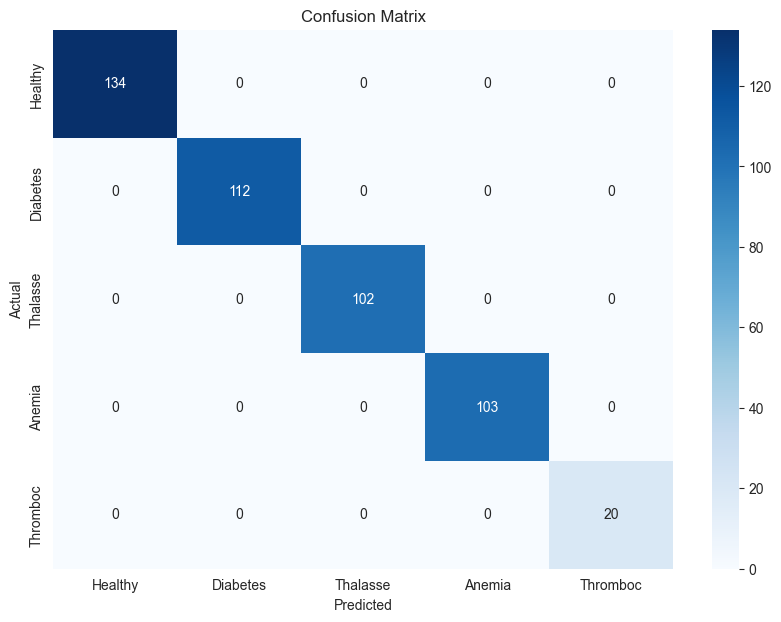

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn for a nicer display
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Print the unique classes in 'Disease'
unique_classes = y.unique()
print("Unique classes in 'Disease':", unique_classes)

Unique classes in 'Disease': ['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc']
Categories (5, object): ['Anemia', 'Diabetes', 'Healthy', 'Thalasse', 'Thromboc']


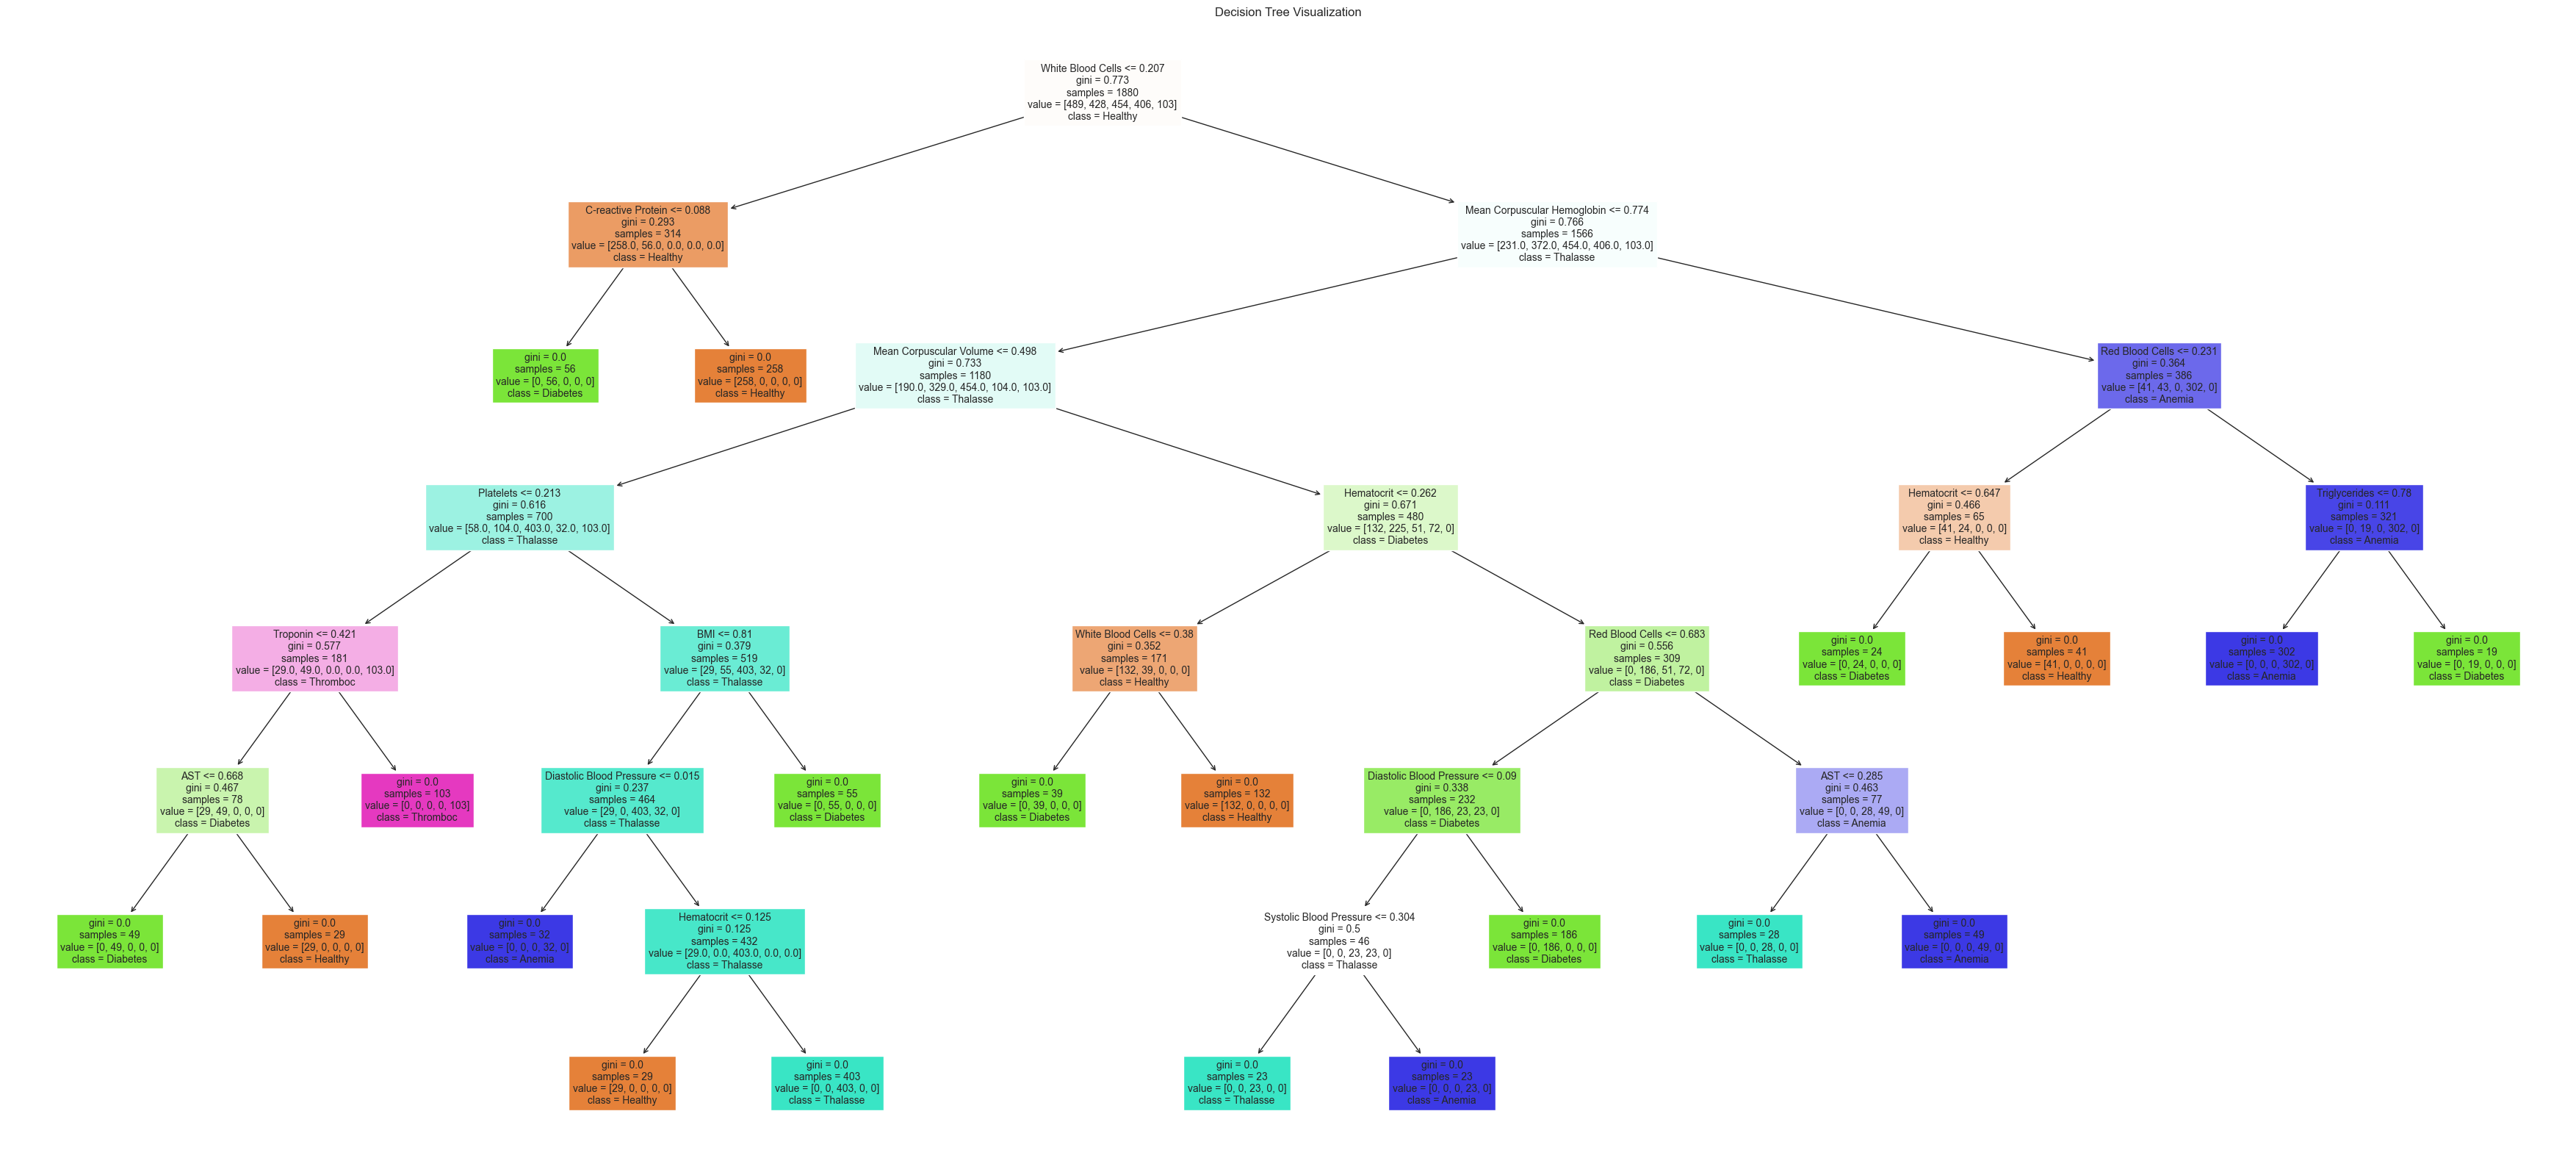

In [12]:
from sklearn.tree import plot_tree

# Setting up the plot size
plt.figure(figsize=(45, 20))

# Plotting the tree with annotations
plot_tree(clf, filled=True, feature_names=X.columns, class_names=y.unique(), fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

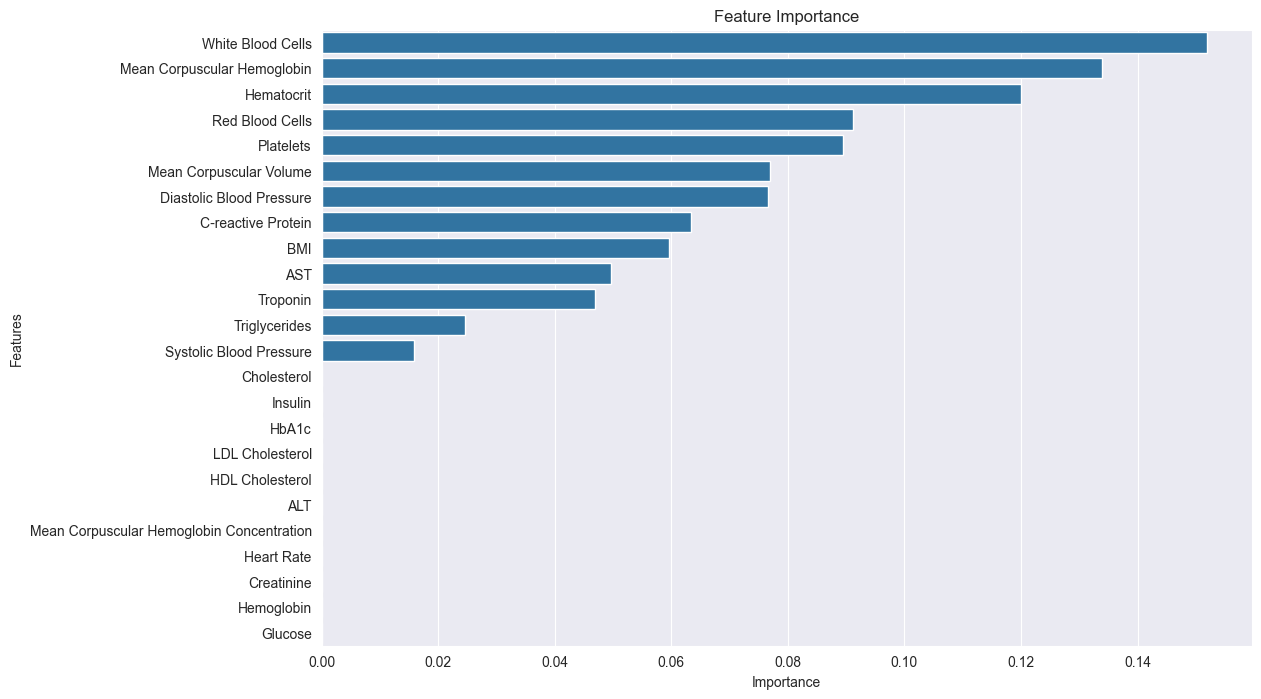

In [13]:
# Creating a pandas Series to visualize feature importance
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

# Conclusions
From the results we can see that with the given dataset we were able to get excellent results with the decision tree classifier. The model was able to predict the disease with an accuracy of 100%. The confusion matrix shows that the model was able to correctly classify all the samples in the test set. The feature importance plot shows that the most important features for predicting the disease are `Diabetes`, `Thalasse`, `Anemia`, `Thromboc`.

In addition to that the feature importance plot shows that the most important features for predicting the disease are `Diabetes`, `Thalasse`, `Anemia`, `Thromboc` are White Blood Cells, Mean Corpuscular Hemoglobin, Hematocrit and Red Blood Cells respectively.

This is a good example of how a decision tree classifier can be used to predict the disease based on the given dataset.